In [5]:
from matplotlib import rc, font_manager
import pandas as pd

In [3]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()

rc('font', family = font_name)

In [45]:
df = pd.read_excel('./my_files/youtube_class.xlsx')
df.head()

,카테고리,채널명,구독자수,총 플레이 수,동영상 수
0,[음악/댄스/가수],BLACKPINK,7130만,220억1380만,395개
1,[음악/댄스/가수],HYBE LABELS,6360만,209억9925만,786개
2,[음악/댄스/가수],BANGTANTV,6290만,146억5398만,"1,665개"
3,[음악/댄스/가수],SMTOWN,2970만,234억2536만,"3,840개"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [46]:
df['카테고리'].value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: 카테고리, dtype: int64

In [47]:
df['변환구독자수'] = df['구독자수'].str.replace('만','0000')
df

,카테고리,채널명,구독자수,총 플레이 수,동영상 수,변환구독자수
0,[음악/댄스/가수],BLACKPINK,7130만,220억1380만,395개,71300000
1,[음악/댄스/가수],HYBE LABELS,6360만,209억9925만,786개,63600000
2,[음악/댄스/가수],BANGTANTV,6290만,146억5398만,"1,665개",62900000
3,[음악/댄스/가수],SMTOWN,2970만,234억2536만,"3,840개",29700000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000
...,...,...,...,...,...,...
95,[BJ/인물/연예인],허팝Heopop,385만,33억0441만,"1,912개",3850000
96,[TV/방송],워크맨-Workman,381만,7억7678만,163개,3810000
97,[음악/댄스/가수],WINNER,381만,12억2780만,461개,3810000
98,[애완/반려동물],크림히어로즈,377만,14억3043만,"1,027개",3770000


In [48]:
df['변환구독자수'] = df['변환구독자수'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   카테고리     100 non-null    object
 1   채널명      100 non-null    object
 2   구독자수     100 non-null    object
 3   총 플레이 수  100 non-null    object
 4   동영상 수    100 non-null    object
 5   변환구독자수   100 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 4.4+ KB


In [49]:
pivot_df = df.pivot_table(values = '변환구독자수',
              index = '카테고리',
              aggfunc = ['sum','count'])
pivot_df

,sum,count
,변환구독자수,변환구독자수
카테고리,,
[BJ/인물/연예인],13570000,3
[TV/방송],87510000,13
[게임],4260000,1
[뉴스/정치/사회],20410000,3
[미분류],6550000,1
[애완/반려동물],8080000,2
[음식/요리/레시피],92890000,14
[음악/댄스/가수],535810000,37


In [50]:
pivot_df.columns = ['subscriber_sum', 'subscriber_count']
pivot_df = pivot_df.reset_index()
pivot_df

,카테고리,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],13570000,3
1,[TV/방송],87510000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20410000,3
4,[미분류],6550000,1
5,[애완/반려동물],8080000,2
6,[음식/요리/레시피],92890000,14
7,[음악/댄스/가수],535810000,37
8,[취미/라이프],4000000,1
9,[키즈/어린이],163730000,22


In [52]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum',
                               ascending = False)
pivot_df = pivot_df.reset_index(drop = True)
pivot_df

,카테고리,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535810000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92890000,14
3,[TV/방송],87510000,13
4,[뉴스/정치/사회],20410000,3
5,[BJ/인물/연예인],13570000,3
6,[애완/반려동물],8080000,2
7,[해외],7750000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


## 파이플롯 예제

In [53]:
import matplotlib.pyplot as plt

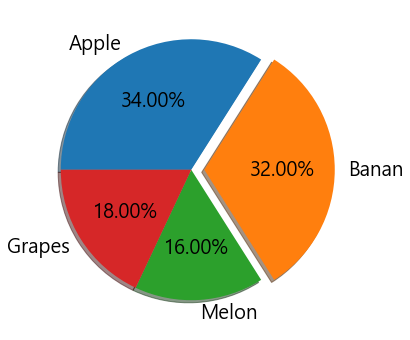

In [73]:
## pie

ratio = [34, 32, 16, 18]
label = ['Apple', 'Banan', 'Melon', 'Grapes']
explodes = [0, 0.1, 0, 0]
colors = [] # 헥스? 색갈 그런거 넣으면 됨

plt.rcParams['font.size'] = 20
plt.figure(figsize = (6,6))
plt.pie(ratio, labels = label,
       autopct = '%.2f%%',
       counterclock = False,
       startangle = 180,
       explode = explodes,
       shadow = True)
plt.show()

In [74]:
pivot_df.head()

,카테고리,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535810000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92890000,14
3,[TV/방송],87510000,13
4,[뉴스/정치/사회],20410000,3


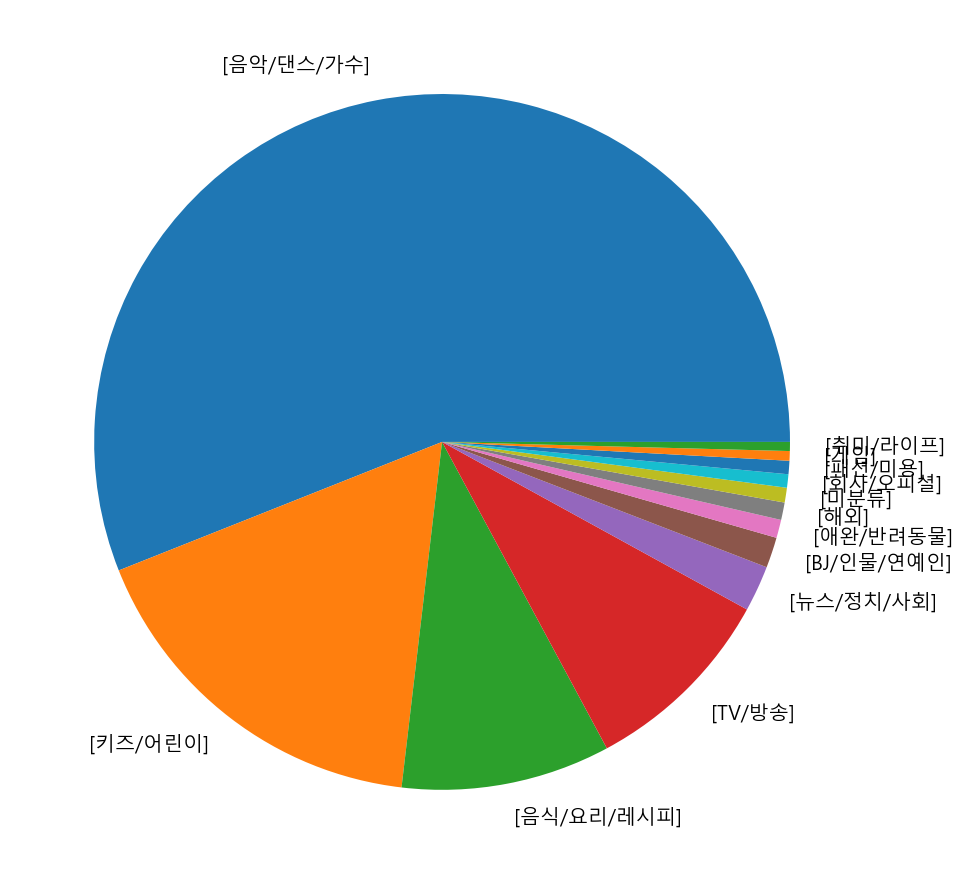

In [85]:
plt.figure(figsize = (16,16))
plt.pie(pivot_df['subscriber_sum'],
       labels = pivot_df['카테고리'])
plt.show()